# Heart Disease Data Preparation

This notebook performs data cleansing, feature engineering, and exploration for the Heart Disease dataset.
It includes MLflow logging and prepares data for potential downstream modeling tasks.

I have downloaded the dataset from [Kaggle-Heart Failure Prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


In [28]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Assignment #3")

<Experiment: artifact_location='/mlflow/artifacts/638935694049763492', creation_time=1754237124820, experiment_id='638935694049763492', last_update_time=1754237124820, lifecycle_stage='active', name='Assignment #3', tags={}>

In [16]:
# Load the heart disease dataset
df = pd.read_csv('../data/heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


## Data Cleansing
We drop rows with empty values and remove duplicates.

In [17]:
# This dataset is already clean and deduplicated but I will do to show the process of data cleansing

# Load the heart disease dataset
df = pd.read_csv('../data/heart.csv')
df.head(10)

# Drop rows with any missing values (precautionary)
df_clean = df.dropna()
print(f"Rows after dropna: {df_clean.shape[0]} (removed {df.shape[0] - df_clean.shape[0]} rows)")

# Remove duplicates
df_clean = df_clean.drop_duplicates()
print(f"Rows after deduplication: {df_clean.shape[0]}")

Rows after dropna: 918 (removed 0 rows)
Rows after deduplication: 918


## Data Exploration
Explore the cleaned dataset.

## One‑Hot Encoding of Categorical Features
We convert non‑numeric categorical variables into binary or one-hot-encoded dummy columns so they can be included in our correlation analysis and subsequent modeling steps.

In [18]:
# show all values of the column 'ChestPainType'
print(set(df_clean['ChestPainType'].values))

# show all values of the column 'RestingECG'
print(set(df_clean['RestingECG'].values))

# show all values of the column 'ST_Slope'
print(set(df_clean['ST_Slope'].values))

# show all values of the column 'Sex'
print(set(df_clean['Sex'].values))

# show all values of the column 'ExerciseAngina'
print(set(df_clean['ExerciseAngina'].values))

{'NAP', 'TA', 'ATA', 'ASY'}
{'Normal', 'ST', 'LVH'}
{'Flat', 'Down', 'Up'}
{'M', 'F'}
{'Y', 'N'}


In [19]:
# Convert categorical columns to binary values
df_clean['Sex'] = df_clean['Sex'].map({'M': 1, 'F': 0})
df_clean['ExerciseAngina'] = df_clean['ExerciseAngina'].map({'Y': 1, 'N': 0})


# One-hot encode categorical features
cat_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
df_enc = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)
print(f'Shape after encoding: {df_enc.shape}')

# Preview the first few rows
df_enc.head(10)

Shape after encoding: (918, 16)


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True
5,39,1,120,339,0,170,0,0.0,0,False,True,False,True,False,False,True
6,45,0,130,237,0,170,0,0.0,0,True,False,False,True,False,False,True
7,54,1,110,208,0,142,0,0.0,0,True,False,False,True,False,False,True
8,37,1,140,207,0,130,1,1.5,1,False,False,False,True,False,True,False
9,48,0,120,284,0,120,0,0.0,0,True,False,False,True,False,False,True


In [20]:
# Basic statistics
df_clean.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


## Correlation Heat‑map (All Features)
This heat‑map shows correlations for **all** features, including the newly created one-hot (dummy) columns.

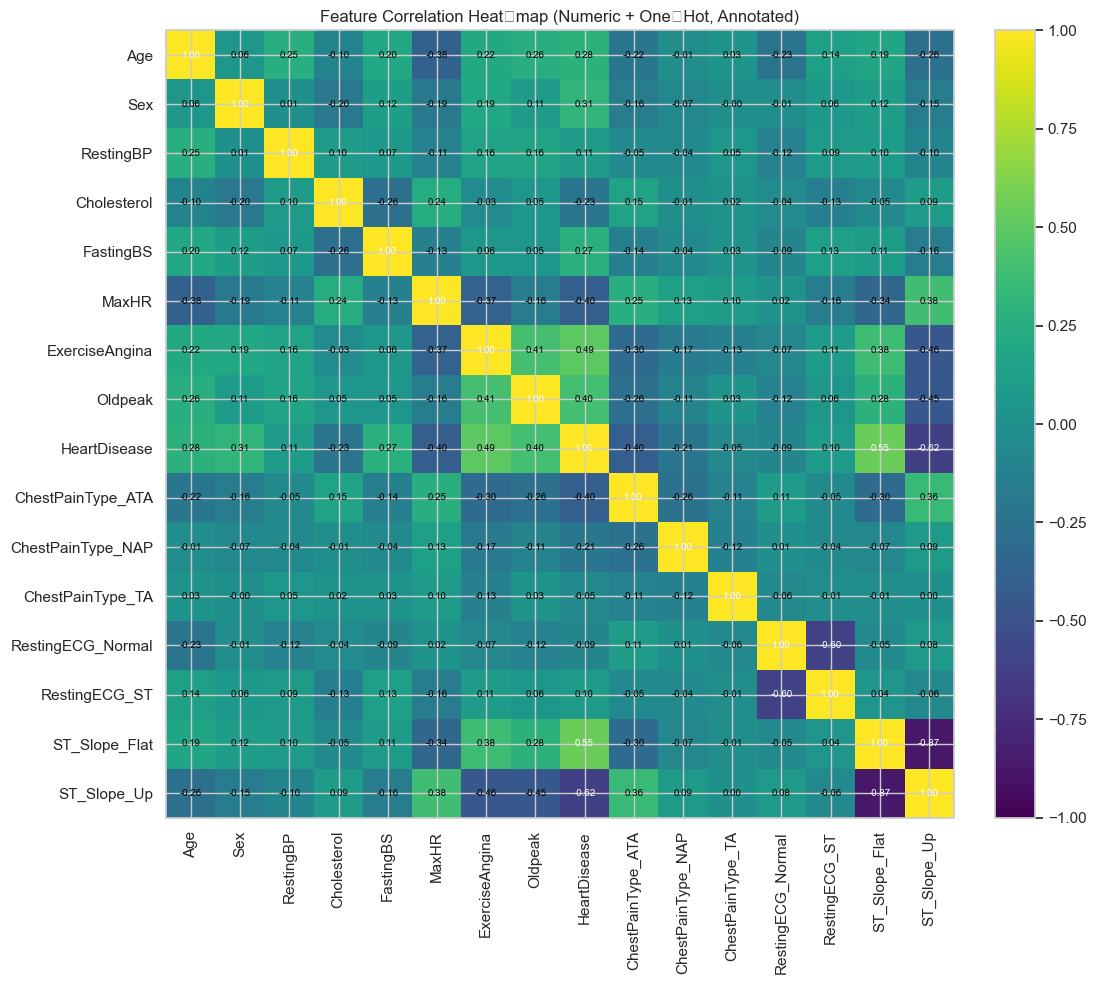

In [34]:
import numpy as np
import matplotlib.pyplot as plt

corr = df_enc.corr()

fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr, vmin=-1, vmax=1, cmap='viridis')

# Axis ticks & labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# Annotate each cell with the correlation coefficient
for (i, j), z in np.ndenumerate(corr.values):
    text_color = 'white' if abs(z) > 0.5 else 'black'
    ax.text(j, i, f'{z:.2f}', ha='center', va='center', fontsize=7, color=text_color)

# Color‑bar & layout
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title('Feature Correlation Heat‑map (Numeric + One‑Hot, Annotated)')
plt.tight_layout()
plt.show()


**Quick take-aways from the full, annotated correlation map**

| Observation                                  | What it tells us                                                                                                                                                                                                                                                                                                                         |            |                                                                                                                                                                                                                                                                                                                                                       |
| -------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| \*\*Strongest predictors of `HeartDisease` ( | r                                                                                                                                                                                                                                                                                                                                        | ≥ 0.4)\*\* | • `Oldpeak` (+0.49) – more ST-depression during exercise → higher risk.<br>• `ExerciseAngina` (+0.49) – angina induced by exercise strongly linked to disease.<br>• `ST_Slope_Flat` (+0.55) vs. `ST_Slope_Up` (-0.62) – flat slope is common in patients, up-sloping is protective.<br>• `MaxHR` (-0.40) – higher attainable heart-rate → lower risk. |
| **Secondary signals**                        | • `Age` (+0.28) and `FastingBS` (+0.27) show moderate positive links.<br>• `Cholesterol` (-0.23) and `RestingBP` (+0.11) have only weak linear association with the target.                                                                                                                                                              |            |                                                                                                                                                                                                                                                                                                                                                       |
| **Feature inter-relationships**              | • `ST_Slope_Flat` vs. `ST_Slope_Up`: r = -0.87 – expected, they are mutually exclusive dummy variables.<br>• `RestingECG_Normal` vs. `RestingECG_ST`: r = -0.60 – same dummy-coding effect.<br>• `ExerciseAngina` correlates with `Oldpeak` (+0.41) and `ST_Slope_Flat` (+0.55), consistent with the treadmill-test physiology.          |            |                                                                                                                                                                                                                                                                                                                                                       |
| **Multicollinearity concerns**               | The strong negative pairs above arise from one-hot encoding and are harmless for tree models, but could inflate variance in linear/logistic regression—consider dropping one of each mutually exclusive set or using regularisation.                                                                                                     |            |                                                                                                                                                                                                                                                                                                                                                       |
| **Actionable insights for modelling**        | 1. Keep **Oldpeak, ExerciseAngina, ST\_Slope dummies, MaxHR** as key features.<br>2. Consider interaction terms (e.g., Age × MaxHR) because Age alone is only weakly correlated but non-linear effects are plausible.<br>3. Continuous variables with weak r still matter for non-linear models; don’t discard them solely on Pearson r. |            |                                                                                                                                                                                                                                                                                                                                                       |

*In short:* treadmill-test findings (ST-slope pattern, exercise-induced angina, maximum heart-rate achieved) dominate the linear signal, while classic resting measurements (cholesterol, resting BP) add little linear information on their own.


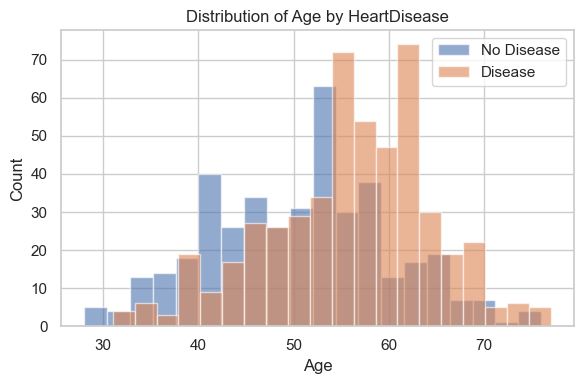

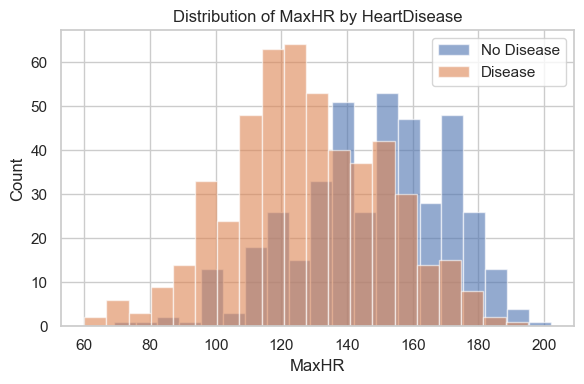

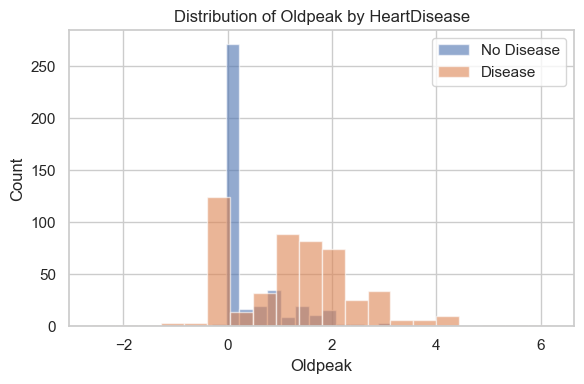

In [35]:
# ===== Overlayed histograms for numeric features by HeartDisease =====
import matplotlib.pyplot as plt

def hist_by_target(feature, bins=20):
    """
    Draw two overlapping histograms of `feature`,
    split by HeartDisease (0 = no disease, 1 = disease).
    """
    plt.figure(figsize=(6, 4))
    plt.hist(df_clean[df_clean['HeartDisease'] == 0][feature],
             bins=bins, alpha=0.6, label='No Disease')
    plt.hist(df_clean[df_clean['HeartDisease'] == 1][feature],
             bins=bins, alpha=0.6, label='Disease')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} by HeartDisease')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- pick the features you want to inspect ---
for feat in ['Age', 'MaxHR', 'Oldpeak']:
    hist_by_target(feat)


### Interpretation of the three over-laid histograms (English)

| Feature                                              | Visual pattern                                                                                                                                                                                        | Take-away                                                                                                                                                                                |
| ---------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Age**                                              | The orange curve (patients **with** HeartDisease) is shifted to the right—especially in the **55–70 yr** range. The blue curve (no disease) dominates below **≈50 yr**. There is still heavy overlap. | Age alone is **not a sharp discriminator**, but the trend is clear: risk increases with age. Useful actions: create age bins or spline features to capture the non-linear effect.        |
| **MaxHR** (maximum heart rate on the treadmill test) | Healthy patients (blue) cluster more often above **150 bpm**; diseased patients (orange) concentrate in the **90–140 bpm** band.                                                                      | High MaxHR appears *protective* (negatively associated with the target). Consider a threshold feature such as `MaxHR > 150` or quantile-based bins.                                      |
| **Oldpeak** (ST-depression)                          | The blue distribution spikes at **0 mm** (no ST-depression). The orange distribution spreads broadly between **1 and 4 mm**.                                                                          | Oldpeak is a **strong positive predictor**: any depression above \~0.5 mm tilts the odds toward disease. You might add a binary flag `Oldpeak>0` or stepped bins (0, 0.1–1, 1–2, >2 mm). |

---

#### Actionable feature-engineering ideas

1. **Age**

   ```python
   df_clean['AgeGroup'] = pd.cut(df_clean['Age'],
                                 bins=[0, 45, 55, 65, 120],
                                 labels=['<45', '45-55', '55-65', '65+'])
   ```

2. **MaxHR**
   *Option A:* standardise; *Option B:*

   ```python
   df_clean['HighMaxHR'] = (df_clean['MaxHR'] > 150).astype(int)
   ```

3. **Oldpeak**
   *Option A:* `df_clean['LogOldpeak'] = np.log1p(df_clean['Oldpeak'])`
   *Option B:* discrete bins as noted above.

4. **Interactions**
   Combine features, e.g. `Age × MaxHR` or `Oldpeak × ST_Slope_Flat`, to capture compound effects.

**Summary:**
The plots reinforce the earlier correlation findings: **Oldpeak** and **MaxHR** have the clearest class-separation, while **Age** contributes a weaker but consistent gradient that benefits from non-linear treatment.


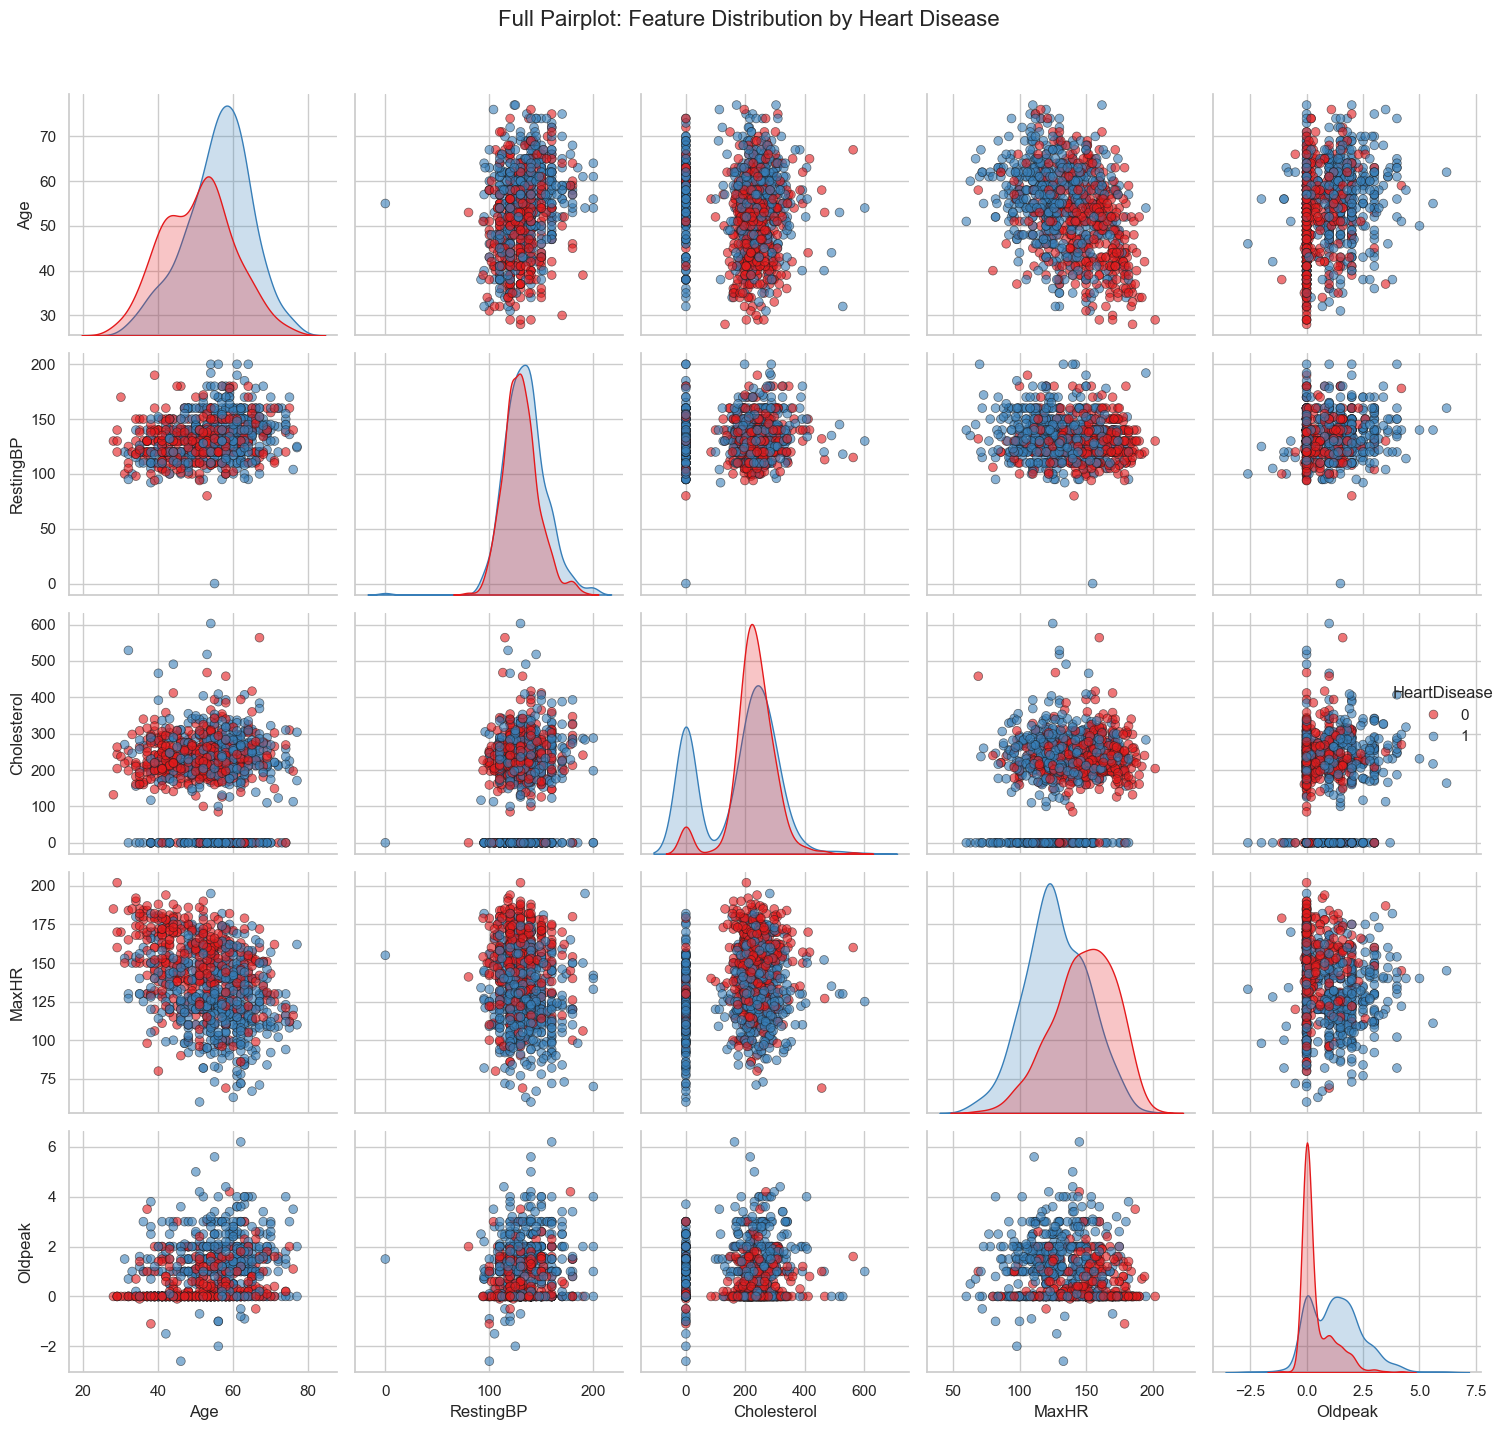

In [23]:
# I have taken this pairplot from: https://www.kaggle.com/code/rajbirahmed/heart-failure-prediction

sns.set(style="whitegrid", context="notebook")
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
pair = sns.pairplot(
    df[features], hue='HeartDisease', palette='Set1', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'}, height=2.8
)

pair.fig.suptitle("Full Pairplot: Feature Distribution by Heart Disease", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### How to read a Seaborn **pairplot**

1. **Layout**

   * Each cell combines two features: the column-variable on the *x-axis* and the row-variable on the *y-axis*.
   * **Diagonal cells** show the univariate distribution of a single feature (here: kernel-density curves split by colour).
   * **Off-diagonal cells** are scatterplots of every pairwise combination.

2. **Colour (hue)**

   * Blue =`HeartDisease 0` (no disease)
   * Red =`HeartDisease 1` (disease)
     Patterns where colours separate well → potentially predictive.

---

### What we see in *this* pairplot

| Cell(s)                                | Visual clue                                                                                                                       | Interpretation                                                                |
| -------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------- |
| **Diagonal – Age**                     | Red KDE curve peaks around **58–60 yr**, blue around **50 yr**                                                                    | Older patients are more likely to have the disease.                           |
| **Diagonal – MaxHR**                   | Blue density leans right (≈150–180 bpm), red left (≈100–140 bpm)                                                                  | Higher achievable heart-rate is protective.                                   |
| **Diagonal – Oldpeak**                 | Red curve clearly shifted right (1–3 mm); blue spikes at 0 mm                                                                     | ST-depression is common in diseased patients, rare in healthy ones.           |
| **Age × MaxHR**                        | Downward slope *and* colour separation: red points cluster top-left (older & low MaxHR), blue bottom-right (younger & high MaxHR) | Confirms the combined risk of age and low MaxHR; a possible interaction term. |
| **Age × Oldpeak**                      | Mild upward trend; many red points at high Oldpeak                                                                                | Older patients often show larger ST-depression → compounding risk.            |
| **MaxHR × Oldpeak**                    | Slight negative slope; region of **high Oldpeak & low MaxHR** is almost entirely red                                              | Suggests a “double-whammy” zone that almost guarantees disease.               |
| **RestingBP & Cholesterol vs. others** | Clouds are mixed (blue and red heavily overlap)                                                                                   | Little linear separation; these variables alone carry weak signal.            |

---

### Practical take-aways

1. **Feature interactions:**
   *Create cross-features* like `Age × MaxHR` or a boolean flag `Oldpeak>1 & MaxHR<120`.
2. **Non-linear modelling:**
   Visible curvatures & overlaps indicate tree/boosting models (or splines) will capture patterns better than pure linear terms.
3. **Outlier check:**
   No extreme outliers dominate; data spread looks reasonably compact.
4. **Redundant features:**
   `RestingBP` and `Cholesterol` add little separation visually; they may still help a tree model but could be dropped for a simpler linear baseline.


## Feature Engineering
Create and transform features.

## Run Experiments - Log inte MLFlow


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, roc_curve
import mlflow
import numpy as np
import pandas as pd

In [31]:
def run_experiment(X, y, run_name, n_estimators=50, max_depth=None):
    """
    Utility: train/test split, RF training, metric dict return & MLflow logging.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scale numeric features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    with mlflow.start_run(run_name=run_name):
        # Train the model
        clf = RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth, random_state=42
        )
        clf.fit(X_train_scaled, y_train)

        y_pred = clf.predict(X_test_scaled)
        y_prob = clf.predict_proba(X_test)[:, 1]

        metrics = {
            "accuracy": accuracy_score(y_test, y_pred),
            "f1": f1_score(y_test, y_pred),
            "roc_auc": roc_auc_score(y_test, y_prob)         
        }

        # log metrics + model
        mlflow.log_metrics(metrics)
        #mlflow.sklearn.log_model(clf, artifact_path="model")

        # optional: print report
        print(f"=== {run_name} ===")
        print(classification_report(y_test, y_pred))
        print({k: f"{v:.3f}" for k, v in metrics.items()}, "\n")
    
    return metrics, confusion_matrix(y_test, y_pred)

=== Baseline_RF ===
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

{'accuracy': '0.875', 'f1': '0.889', 'roc_auc': '0.841'} 

🏃 View run Baseline_RF at: http://localhost:5000/#/experiments/638935694049763492/runs/d5fb4cac082b4c1f897aadf8b30114a6
🧪 View experiment at: http://localhost:5000/#/experiments/638935694049763492


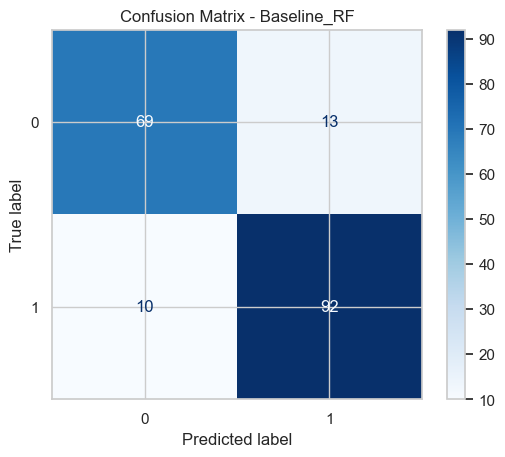

In [33]:
# ================================================================
# Baseline: train & evaluate without extra feature engineering
# ================================================================

# ---- baseline feature matrix (df_enc kommt aus vorherigen Steps) ----
X_base = df_enc.drop(columns=["HeartDisease"])
y = df_enc["HeartDisease"]

metrics_base, conf_matrix_base = run_experiment(X_base, y, run_name="Baseline_RF")

# ---- confusion matrix ----
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_base)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - Baseline_RF")
plt.show()



## Feature Engineering

=== FeatureEng_RF ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

{'accuracy': '0.880', 'f1': '0.892', 'roc_auc': '0.839'} 

🏃 View run FeatureEng_RF at: http://localhost:5000/#/experiments/638935694049763492/runs/570e66b4c5b64be8a25a94d4b8cdb7ec
🧪 View experiment at: http://localhost:5000/#/experiments/638935694049763492


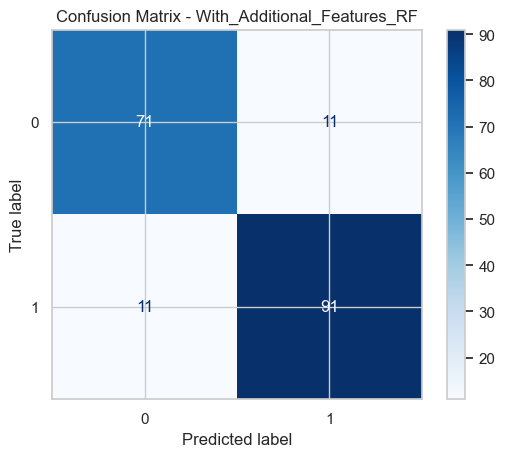

In [37]:
# ================================================================
# Feature-Engineering-Block
# ================================================================

df_fe = df_enc.copy()

# Age bins
df_fe["AgeGroup"] = pd.cut(
    df_fe["Age"],
    bins=[0, 45, 55, 65, 120],
    labels=["<45", "45-55", "55-65", "65+"]
)

# Binary flag: high maximum HR
df_fe["HighMaxHR"] = (df_fe["MaxHR"] > 150).astype(int)


# Interaktion: ExerciseAngina * Oldpeak  (captures additive risk)
df_fe["Angina_Oldpeak"] = df_fe["ExerciseAngina"] * df_fe["Oldpeak"]

# One-hot encode the newly created AgeGroup (drop_first avoids multicollinearity)
df_fe = pd.get_dummies(df_fe, columns=["AgeGroup"], drop_first=True)

# ---- engineered feature matrix ----
X_fe = df_fe.drop(columns=["HeartDisease"])
y = df_fe["HeartDisease"]

metrics_fe, conf_matrix_fe = run_experiment(X_fe, y, run_name="FeatureEng_RF")

# ---- confusion matrix ----
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_fe)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - With_Additional_Features_RF")
plt.show()


In [38]:
# ================================================================
# 3️⃣  Simple comparison printout
# ================================================================
print("🔎  Metric comparison (Baseline  ➜  Feature Engineering)")
for m in metrics_base.keys():
    base_val = metrics_base[m]
    fe_val   = metrics_fe[m]
    delta    = fe_val - base_val
    print(f"{m:<9}: {base_val:.3f}  ➜  {fe_val:.3f}   (Δ {delta:+.3f})")

🔎  Metric comparison (Baseline  ➜  Feature Engineering)
accuracy : 0.875  ➜  0.880   (Δ +0.005)
f1       : 0.889  ➜  0.892   (Δ +0.003)
roc_auc  : 0.841  ➜  0.839   (Δ -0.002)
